## Review of EDA Procedure

---

This lesson uses a boston housing market dataset to walk through a basic exploratory data analysis procedure, starting from the very beginning with loading the data. 

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would go through when taking a look at a new dataset.

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 6.4MB/s 


### Lesson Guide

- [Description of the Boston Housing Data](#data_description)
- [Loading the data](#load_data)
- [Drop unwanted columns](#drop)
- [Clean corrupted data](#clean)
- [Count null values and drop rows](#drop_nulls)
- [Rename columns](#rename)
- [Investigate potential outliers with boxplots](#boxplots)
- [Plot all variables together](#plot_all)
- [Standardization of variables](#standardization)
- [Plot the standardized variables together](#plot_all_rescaled)
- [Look at the covariance or correlation between variables](#cov_cor)


<a id='data_description'></a>

### Description of the Boston Housing Data columns

---

The columns of the dataset are coded. The corresponding descriptions are:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset represents a different suburb of Boston.

These descriptions of shortened or coded variables are often called "codebooks" or data dictionaries. They are typically found with datasets you might find online in a separate file.


**Load packages:**

In [0]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [0]:
boston_file = './datasets/housing.csv'

In [0]:
# A:
boston = pd.read_csv(boston_file)
boston.head(20)


FileNotFoundError: ignored

In [0]:
boston.RAD.value_counts().tolist()[0:2]

[123, 107]

<a id='header'></a>

### 2. Describe the basic format of the data and the columns

---

Use the `.head()` function (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. This is a good initial step to get a feel for what is in the csv and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [0]:
# Print out the first 8 rows:


In [0]:
# Look at the dtypes of the columns:
boston.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS            int64
NOX           float64
RM            float64
AGE           float64
DIS            object
RAD            object
TAX             int64
PTRATIO       float64
B             float64
LSTAT         float64
MEDV          float64
dtype: object

<a id='drop'></a>

### 2. Drop unwanted columns

---

There is a column labeled `Unnamed: 0` which appears to simply number the rows. We already have the number id of the rows in the DataFrame's index and so we don't need this column.

The `.drop()` built-in function can be used to get rid of a column. When removing a column, we need to specify `axis=1` to the function.

For the record, the `.index` attribute holds the row indices. This is the the sister attribute to the `.columns` attribute that we work with more often.



In [0]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:


In [0]:
# Remove the unneccesary column:
df.drop(['col, col5'], axis=1)

<a id='clean'></a>

### 3. Clean corrupted columns

---

You may have noticed when we examined the `dtypes` attribute that two of the columns were of type "object", indicating that they were string. However, we know from the data description above (and we can infer from the header of the data) that `DIS` and `RAD` should in fact be numeric.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

**3.A What is causing the `DIS` column to be encoded as a string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip:  use a for loop.*

In [0]:
# A:

**3.B What is causing the `RAD` column to be encoded as string? Figure out a way to make sure the column is numeric while preserving information.**

*Tip: You can put `np.nan` values in place of corrupted observations, which are numeric "Null" values.*

In [0]:
# A:

<a id='drop_nulls'></a>

### 4. Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `RAD` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing and for which columns.

A handy way to look at how many null values there are per column with pandas is:

```python
boston.isnull().sum()
```

The `.isull()` built-in function will convert the columns to boolean `True` and `False` values (returning a new dataframe) where null values are indicated by `True`. 

The `.sum()` function tacked on to the back of that will then sum these boolean columns, and the total number of null values per column will be returned.

In [0]:
# A:

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values. In this case, we will just drop the rows.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

In [0]:
# A:

<a id='rename'></a>

### 5. Make the column names more descriptive

---

Often it is annoying to have to memorize what the codes mean for columns, or reference the codebook whenever I want to know the meaning of a variable. It often makes sense to rename columns that are not descriptive.

There is more than one way to do this, but one easy way is to use the `.rename()` function.

Here are the column names and their descriptions again for reference:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars

In [0]:
# A:

There two popular methods to rename dataframe columns.
1. Using a _dictionary substitution_, which is very useful if you only want to rename a few of the columns. This method uses the `.rename()` function.
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

In [0]:
# Dictionary Method

In [0]:
# List Replacement Method

<a id='describe'></a>

### 6. Describe the summary statistics for the columns

---

The `.describe()` function gives summary statistics for each of your variables. What are some, if any, oddities you notice about the variables based on this output?

In [0]:
# A:
boston.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


<a id='boxplots'></a>

### 7. Plot variables with potential outliers using boxplots.

---

Here we will plot boxplots of the variables we have identified as potentially having outliers.

_If you want to check out more, place your cursor in the `boxplot` argument bracket and press `shift+tab` (Press four times repeatedly to bring up detailed documentation)._
    

In [0]:
# rate of crime


In [0]:
# percent owner occupied


In [0]:
# business zone percent


In [0]:
# black population statistic


<a id='plot_all'></a>

### 8. Plot all the variables on boxplots together.

---

Plot all the variables

In [0]:
# A:


<a id='standardization'></a>

### 9. Standardizing variables

---

Rescaling variables is very common, and sometimes essential. For example, when we get to regularization of models the rescaling procedure becomes a requirement before fitting the model.

Here we'll rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

Standardization is not complicated:

    standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
Note: Nothing else is changed about the distribution of the variable. It doesn't become normally distributed.

**9.A Pull out rate of crime and plot the distribution.**

Also print out the mean and standard deviation of the original variable.

In [0]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,396.90,5.33,36.2


In [0]:
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
boston['CRIM_sd'] = (boston['CRIM']  - boston['CRIM'].mean()) / boston['CRIM'].std() 
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_sd
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,396.90,4.98,24.0,-0.419367
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,396.90,9.14,21.6,-0.416927
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,392.83,4.03,34.7,-0.416929
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,394.63,2.94,33.4,-0.416338
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,396.90,5.33,36.2,-0.412074


In [0]:
#boston['CRIM_sd'].mean()
boston['CRIM_sd'].std()

1.0000000000000002

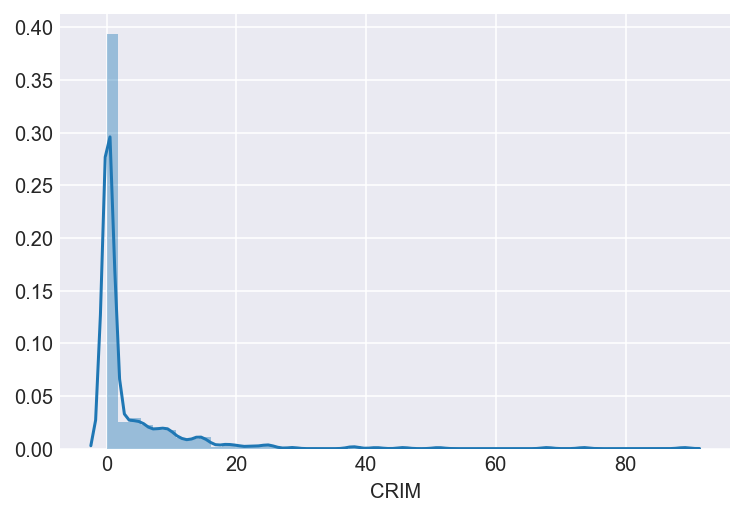

In [0]:
sns.distplot(boston['CRIM'])

In [0]:
boston['CRIM'].mean()
boston['CRIM'].std()

8.601545105332487

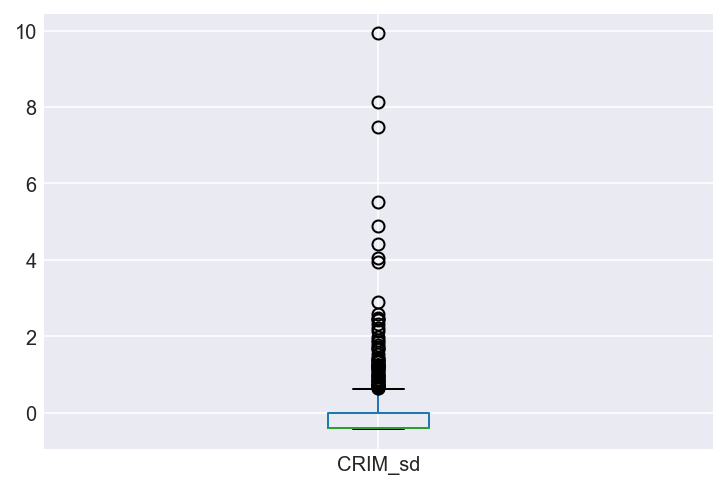

In [0]:
#boston [['CRIM','CRIM_sd']].plot(kind='box')


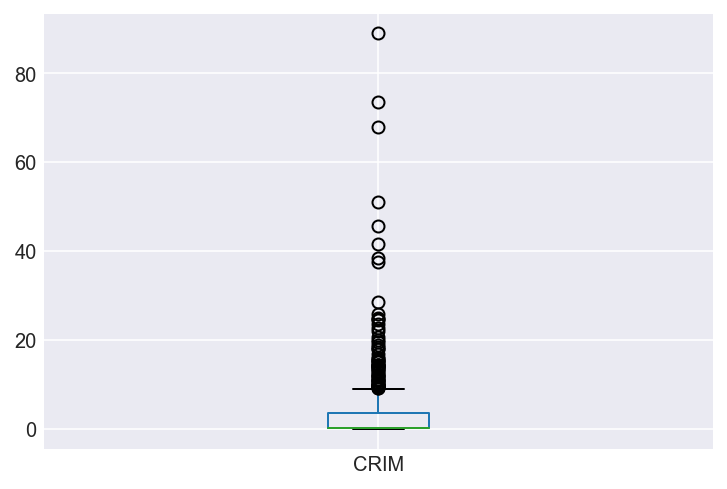

In [0]:
boston ['CRIM'].plot(kind='box')
boston[boston['CRIM']<20]

In [0]:
#boston['CRIM_sd'] = [((x - boston['CRIM'].mean()) / boston['CRIM'].std()) for x in boston['CRIM']]
boston['CRIM_sd'] = (boston.CRIM - boston.CRIM.mean()) / boston.CRIM.std()

In [0]:
boston.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,2.525000e+02,146.213884,0.000000,126.250000,252.50000,378.750000,505.00000
CRIM,506.0,3.613524e+00,8.601545,0.006320,0.082045,0.25651,3.677082,88.97620
ZN,506.0,1.136364e+01,23.322453,0.000000,0.000000,0.00000,12.500000,100.00000
INDUS,506.0,1.113678e+01,6.860353,0.460000,5.190000,9.69000,18.100000,27.74000
CHAS,506.0,6.916996e-02,0.253994,0.000000,0.000000,0.00000,0.000000,1.00000
NOX,506.0,5.546951e-01,0.115878,0.385000,0.449000,0.53800,0.624000,0.87100
RM,506.0,6.284634e+00,0.702617,3.561000,5.885500,6.20850,6.623500,8.78000
AGE,506.0,6.857490e+01,28.148861,2.900000,45.025000,77.50000,94.075000,100.00000
TAX,506.0,4.082372e+02,168.537116,187.000000,279.000000,330.00000,666.000000,711.00000
PTRATIO,506.0,1.845553e+01,2.164946,12.600000,17.400000,19.05000,20.200000,22.00000


In [0]:
boston['CRIM'].mean()
boston['CRIM'].std()

8.601545105332487

In [0]:
# A:
boston['CRIM'].describe()


count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: CRIM, dtype: float64

**9.B Standardize the rate_of_crime variable. Notice the new mean is centered at 0.**

In [0]:
# A:
boston['CRIM_sd'] =(boston['CRIM']-boston['CRIM'].mean())/boston['CRIM'].std()
boston.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,2.525000e+02,146.213884,0.000000,126.250000,252.50000,378.750000,505.00000
CRIM,506.0,3.613524e+00,8.601545,0.006320,0.082045,0.25651,3.677082,88.97620
ZN,506.0,1.136364e+01,23.322453,0.000000,0.000000,0.00000,12.500000,100.00000
INDUS,506.0,1.113678e+01,6.860353,0.460000,5.190000,9.69000,18.100000,27.74000
CHAS,506.0,6.916996e-02,0.253994,0.000000,0.000000,0.00000,0.000000,1.00000
NOX,506.0,5.546951e-01,0.115878,0.385000,0.449000,0.53800,0.624000,0.87100
RM,506.0,6.284634e+00,0.702617,3.561000,5.885500,6.20850,6.623500,8.78000
AGE,506.0,6.857490e+01,28.148861,2.900000,45.025000,77.50000,94.075000,100.00000
TAX,506.0,4.082372e+02,168.537116,187.000000,279.000000,330.00000,666.000000,711.00000
PTRATIO,506.0,1.845553e+01,2.164946,12.600000,17.400000,19.05000,20.200000,22.00000


**9.C Plot the original and standardized rate of crime. Notice that nothing changes about the distribution except for the location and the scale.**

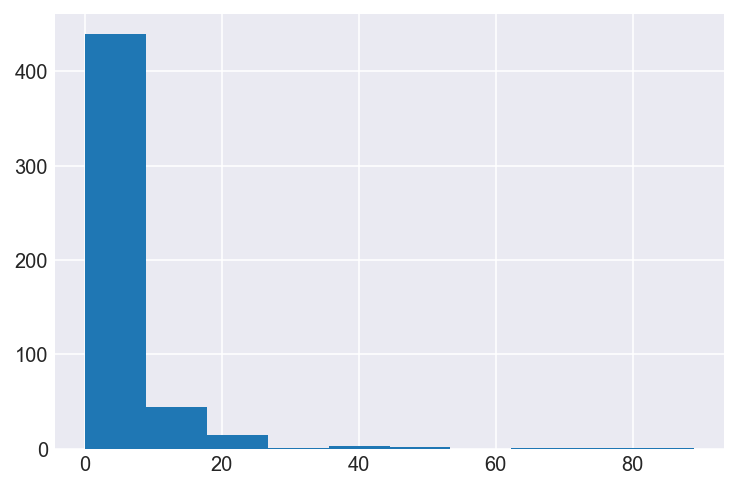

In [0]:
boston['CRIM'].hist()

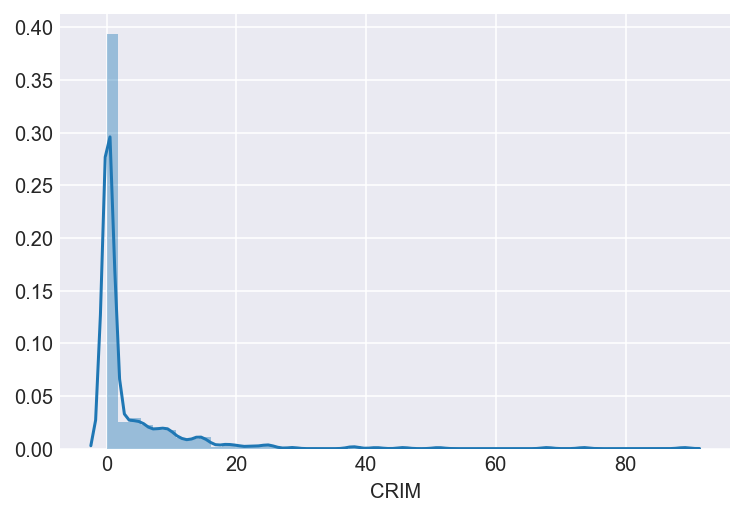

In [0]:
sns.distplot(boston.CRIM)

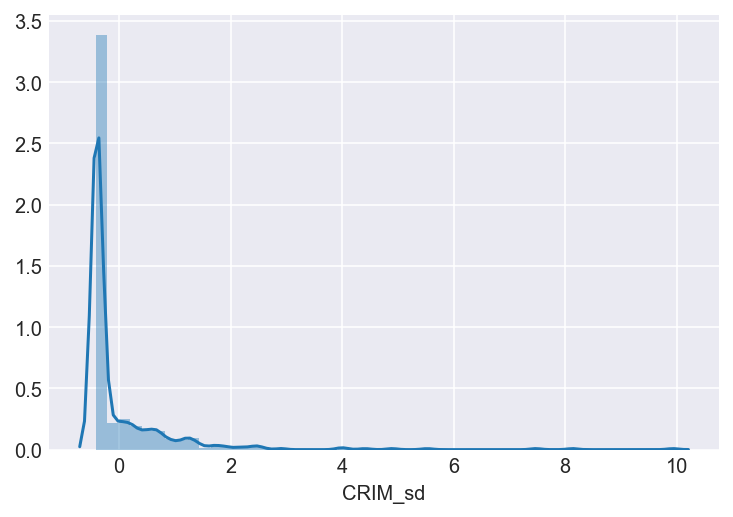

In [0]:
sns.distplot(boston['CRIM_sd'])

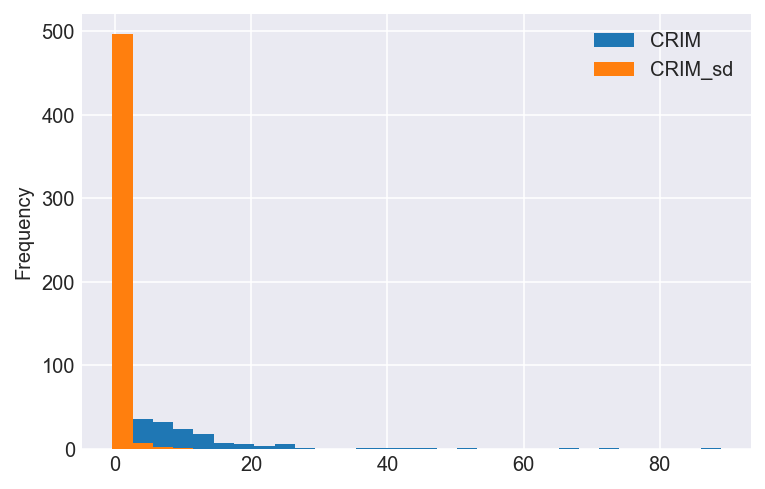

In [0]:
boston[['CRIM','CRIM_sd']].plot(kind='hist',bins=30)

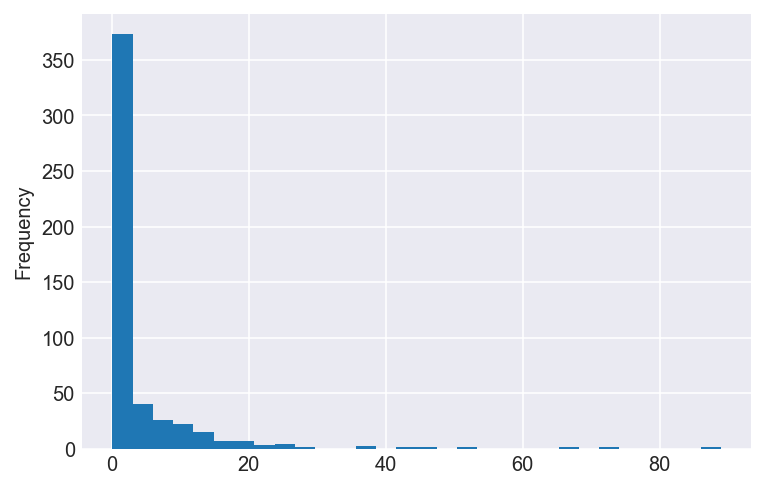

In [0]:
# A:
boston.CRIM.plot(kind='hist',bins=30)


<a id='plot_all_rescaled'></a>

### 10. Standardize all of the columns and re-create the boxplot

---

Pandas DataFrames make it extremely easy to standardize the columns all at once. You can standardize the data like so:

```python
boston_stand = (boston - boston.mean()) / boston.std()
```

Create a standardized version of the data and recreate the boxplot. Now you can better examine the differences in the shape of distributions across our variables.

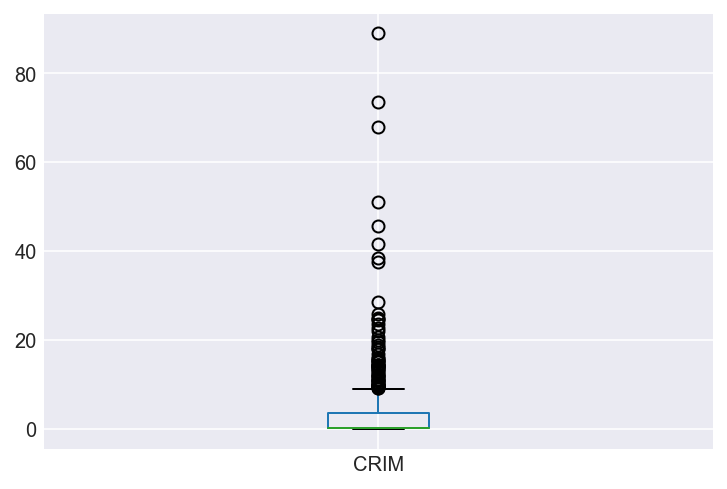

In [0]:
# A:
boston.CRIM.plot(kind='box')


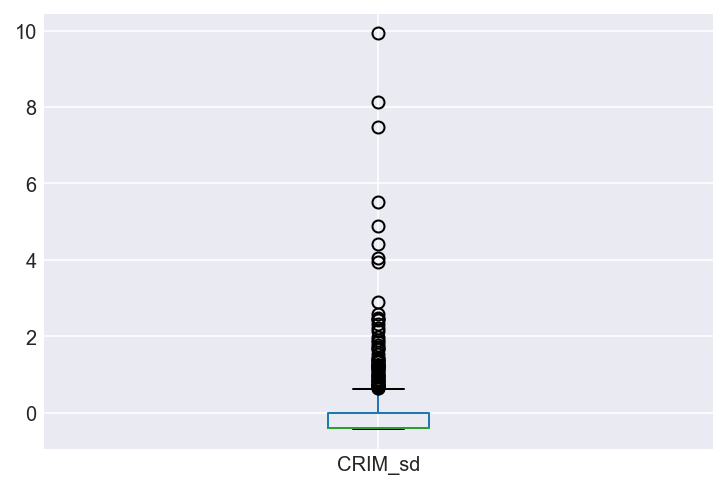

In [0]:
boston.CRIM_sd.plot(kind='box')


<a id='cov_cor'></a>

### 11. Covariance and correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the covariance between two variables $X$ and $Y$:

#### 11.A Covariance

Given sample size $N$ variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$

The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of $X$ times deviations from the mean of $Y$ adjusted by the sample size $N$.

Code the covariance between `pct_underclass` and `home_median_value` below by hand. Verify that you got the correct result using `np.cov()`. Set the keyword argument `bias=True` in `np.cov()` to have it use the same covariance calculation.

Note: `np.cov` returns a covariance _matrix_, which will be each values covariance with itself and the other variable in matrix format.

In [0]:
# A:

#### 11.B Correlation

Covariance is not very interpretable. The values are difficult to read because they are relative to the variance of the variables.

A much more common metric, and one directly calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$



#### 11.C The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

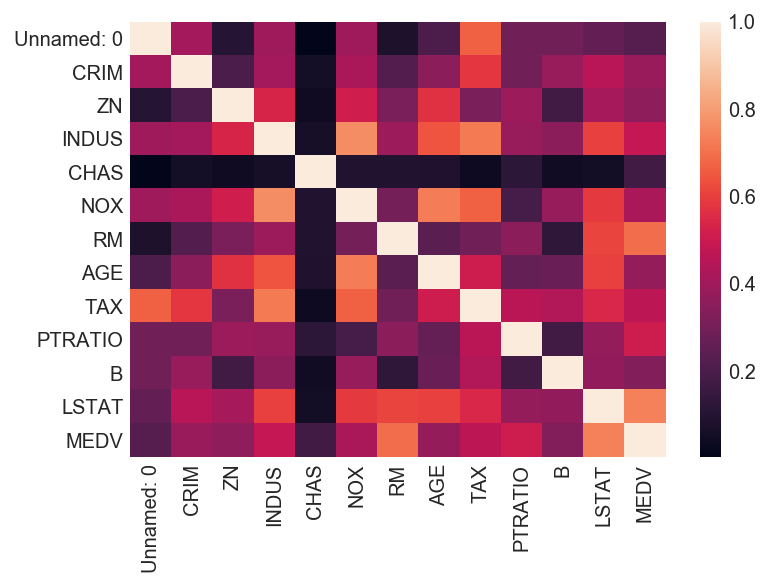

In [0]:
# A:
sns.heatmap(boston.corr().abs())

**Seaborn heatmap can show this to us visually, if colors stick out to you more than decimol values.**

In [0]:
# A:
boston.corr().MEDV.abs().sort_values(ascending=False)[1:5].index

Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS'], dtype='object')